In [16]:
#import layer

import requests
from bs4 import BeautifulSoup as bs
import json
import pandas as pd
from tqdm.notebook import tqdm
import os
import re
import seaborn as sns
import missingno as msno 
import numpy as np

import matplotlib.pyplot as plt
# 한글 폰트 설정|
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = (20,10)
# 유니코드에서  음수 부호설정
plt.rc('axes', unicode_minus=False)

In [2]:
weather = pd.read_csv('./기상청통합.csv',low_memory=False)

In [3]:
power = pd.read_csv('./2017~2021년 일별 지역별 태양광 발전량.csv')

In [6]:
weather

,stnId,stnNm,tm,avgTa,minTa,minTaHrmt,maxTa,maxTaHrmt,mi10MaxRn,mi10MaxRnHrmt,...,avgM10Te,avgM15Te,avgM30Te,avgM50Te,sumLrgEv,sumSmlEv,n99Rn,iscs,sumFogDur,지역
0,90,속초,2017-01-01,6.0,1.5,639.0,9.8,1224.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강원도
1,90,속초,2017-01-02,8.2,4.7,2243.0,10.5,1402.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강원도
2,90,속초,2017-01-03,6.2,1.7,701.0,11.3,1344.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강원도
3,90,속초,2017-01-04,5.6,1.7,2237.0,9.8,1114.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강원도
4,90,속초,2017-01-05,2.8,1.3,59.0,4.0,1101.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강원도
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173530,211,인제,2021-12-27,-9.7,-15.4,354.0,-4.3,1352.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강원도
173531,211,인제,2021-12-28,-4.2,-12.5,501.0,1.8,1507.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강원도
173532,211,인제,2021-12-29,0.3,-5.5,440.0,3.6,1209.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강원도
173533,211,인제,2021-12-30,-3.6,-6.3,2359.0,-0.5,1418.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강원도


In [9]:
power

,지역,일시,발전량,년,월,계절
0,강원도,2017-01-01,154918.180,2017,1,봄
1,강원도,2017-01-02,104640.902,2017,1,봄
2,강원도,2017-01-03,258526.982,2017,1,봄
3,강원도,2017-01-04,259588.645,2017,1,봄
4,강원도,2017-01-05,109151.179,2017,1,봄
...,...,...,...,...,...,...
31037,충청북도,2021-12-27,612336.293,2021,12,겨울
31038,충청북도,2021-12-28,260067.376,2021,12,겨울
31039,충청북도,2021-12-29,281289.137,2021,12,겨울
31040,충청북도,2021-12-30,661147.861,2021,12,겨울


In [10]:
weather.columns

Index(['stnId', 'stnNm', 'tm', 'avgTa', 'minTa', 'minTaHrmt', 'maxTa',
       'maxTaHrmt', 'mi10MaxRn', 'mi10MaxRnHrmt', 'hr1MaxRn', 'hr1MaxRnHrmt',
       'sumRnDur', 'sumRn', 'maxInsWs', 'maxInsWsWd', 'maxInsWsHrmt', 'maxWs',
       'maxWsWd', 'maxWsHrmt', 'avgWs', 'hr24SumRws', 'maxWd', 'avgTd',
       'minRhm', 'minRhmHrmt', 'avgRhm', 'avgPv', 'avgPa', 'maxPs',
       'maxPsHrmt', 'minPs', 'minPsHrmt', 'avgPs', 'ssDur', 'sumSsHr',
       'hr1MaxIcsrHrmt', 'hr1MaxIcsr', 'sumGsr', 'ddMefs', 'ddMefsHrmt',
       'ddMes', 'ddMesHrmt', 'sumDpthFhsc', 'avgTca', 'avgLmac', 'avgTs',
       'minTg', 'avgCm5Te', 'avgCm10Te', 'avgCm20Te', 'avgCm30Te', 'avgM05Te',
       'avgM10Te', 'avgM15Te', 'avgM30Te', 'avgM50Te', 'sumLrgEv', 'sumSmlEv',
       'n99Rn', 'iscs', 'sumFogDur', '지역'],
      dtype='object')

In [11]:
weather.columns = ['지점 번호', '지점명', '일시', '평균 기온', '최저 기온', '최저 기온 시각', '최고 기온',
       '최고 기온 시각', '10분 최다강수량', '10분 최다강수량 시각', '1시간 최다강수량', '1시간 최다 강수량 시각',
       '강수 계속시간', '일강수량', '최대 순간풍속', '최대 순간 풍속 풍향', '최대 순간풍속 시각', '최대 풍속',
       '최대 풍속 풍향', '최대 풍속 시각', '평균 풍속', '풍정합', '최다 풍향', '평균 이슬점온도',
       '최소 상대습도', '평균 상대습도 시각', '평균 상대습도', '평균 증기압', '평균 현지기압', '최고 해면 기압',
       '최고 해면기압 시각', '최저 해면기압', '최저 해면기압 시각', '평균 해면기압', '가조시간', '합계 일조 시간',
       '1시간 최다 일사 시각', '1시간 최다 일사량', '합계 일사량', '일 최심신적설', '일 최심신적설 시각',
       '일 최심적설', '일 최심적설 시각', '합계 3시간 신적설', '평균 전운량', '평균 중하층운량', '평균 지면온도',
       '최저 초상온도', '평균 5cm 지중온도', '평균10cm 지중온도', '평균 20cm 지중온도', '평균 30cm 지중온도', '0.5m 지중온도',
       '1.0m 지중온도', '1.5m 지중온도', '3.0m 지중온도', '5.0m 지중온도', '합계 대형증발량', '합계 소형증발량',
       '9-9강수', '일기현상', '안개 계속 시간', '지역']

In [12]:
pd.merge(power,weather).columns

Index(['지역', '일시', '발전량', '년', '월', '계절', '지점 번호', '지점명', '평균 기온', '최저 기온',
       '최저 기온 시각', '최고 기온', '최고 기온 시각', '10분 최다강수량', '10분 최다강수량 시각',
       '1시간 최다강수량', '1시간 최다 강수량 시각', '강수 계속시간', '일강수량', '최대 순간풍속',
       '최대 순간 풍속 풍향', '최대 순간풍속 시각', '최대 풍속', '최대 풍속 풍향', '최대 풍속 시각', '평균 풍속',
       '풍정합', '최다 풍향', '평균 이슬점온도', '최소 상대습도', '평균 상대습도 시각', '평균 상대습도',
       '평균 증기압', '평균 현지기압', '최고 해면 기압', '최고 해면기압 시각', '최저 해면기압', '최저 해면기압 시각',
       '평균 해면기압', '가조시간', '합계 일조 시간', '1시간 최다 일사 시각', '1시간 최다 일사량', '합계 일사량',
       '일 최심신적설', '일 최심신적설 시각', '일 최심적설', '일 최심적설 시각', '합계 3시간 신적설', '평균 전운량',
       '평균 중하층운량', '평균 지면온도', '최저 초상온도', '평균 5cm 지중온도', '평균10cm 지중온도',
       '평균 20cm 지중온도', '평균 30cm 지중온도', '0.5m 지중온도', '1.0m 지중온도', '1.5m 지중온도',
       '3.0m 지중온도', '5.0m 지중온도', '합계 대형증발량', '합계 소형증발량', '9-9강수', '일기현상',
       '안개 계속 시간'],
      dtype='object')

In [13]:
weather_power = pd.merge(power,weather)

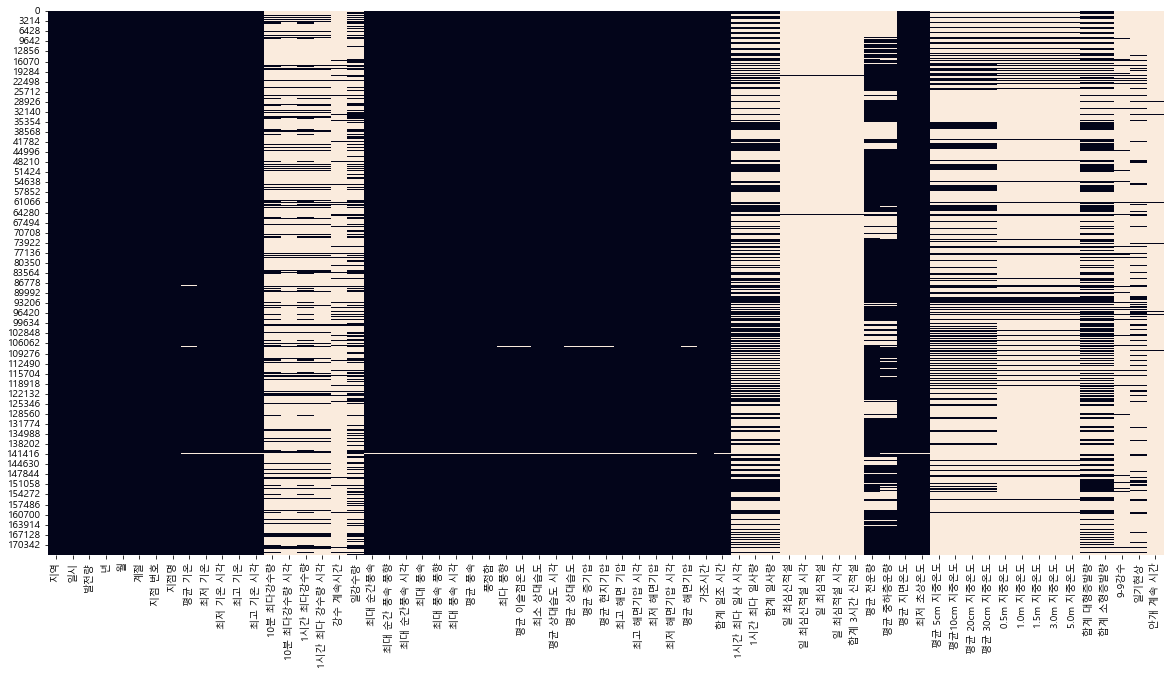

In [17]:
# Null값 시각화

sns.heatmap(weather_power.isnull(), cbar=False)
plt.show()

In [15]:
weather_power[weather_power.isna().any(axis=1)]

,지역,일시,발전량,년,월,계절,지점 번호,지점명,평균 기온,최저 기온,...,0.5m 지중온도,1.0m 지중온도,1.5m 지중온도,3.0m 지중온도,5.0m 지중온도,합계 대형증발량,합계 소형증발량,9-9강수,일기현상,안개 계속 시간
0,강원도,2017-01-01,154918.180,2017,1,봄,90,속초,6.0,1.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,강원도,2017-01-01,154918.180,2017,1,봄,212,홍천,0.5,-3.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,강원도,2017-01-01,154918.180,2017,1,봄,93,북춘천,-0.4,-5.5,...,4.4,7.4,11.4,16.2,18.6,0.6,0.8,0.0,-{박무}-{박무}{강도0}0300-{시정(미만)}{1km}{안개}0530-{시정(...,3.17
3,강원도,2017-01-01,154918.180,2017,1,봄,216,태백,0.2,-4.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,강원도,2017-01-01,154918.180,2017,1,봄,95,철원,-0.2,-6.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173530,충청북도,2021-12-31,836706.701,2021,12,겨울,239,세종,-5.1,-8.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
173531,충청북도,2021-12-31,836706.701,2021,12,겨울,127,충주,-6.4,-11.4,...,NaN,NaN,NaN,NaN,NaN,1.3,1.8,NaN,NaN,NaN
173532,충청북도,2021-12-31,836706.701,2021,12,겨울,131,청주,-4.6,-6.2,...,NaN,NaN,NaN,NaN,NaN,1.3,1.8,NaN,NaN,NaN
173533,충청북도,2021-12-31,836706.701,2021,12,겨울,133,대전,-5.0,-8.3,...,3.0,6.8,9.6,15.5,18.2,1.3,1.9,NaN,-{눈}-0040.,NaN


In [25]:
# Null값 1000개 이상 목록
# Null값이 너무 많아 data 제거하기로 함

weather_power.isna().sum()[weather_power.isna().sum() > 1000]

10분 최다강수량        131584
10분 최다강수량 시각     144507
1시간 최다강수량        131597
1시간 최다 강수량 시각    143268
강수 계속시간          157336
일강수량             109338
1시간 최다 일사 시각      94407
1시간 최다 일사량        94467
합계 일사량            94471
일 최심신적설          172499
일 최심신적설 시각       172569
일 최심적설           172040
일 최심적설 시각        172064
합계 3시간 신적설       172501
평균 전운량            43787
평균 중하층운량          47334
평균 5cm 지중온도      123022
평균10cm 지중온도      123038
평균 20cm 지중온도     122960
평균 30cm 지중온도     122979
0.5m 지중온도        149823
1.0m 지중온도        149818
1.5m 지중온도        149820
3.0m 지중온도        149819
5.0m 지중온도        149828
합계 대형증발량          94705
합계 소형증발량          94705
9-9강수            158715
일기현상             145397
안개 계속 시간         170600
dtype: int64

In [26]:
#삭제 리스트 제작

delidx = weather_power.isna().sum()[weather_power.isna().sum() > 1000].index

In [27]:
delidx

Index(['10분 최다강수량', '10분 최다강수량 시각', '1시간 최다강수량', '1시간 최다 강수량 시각', '강수 계속시간',
       '일강수량', '1시간 최다 일사 시각', '1시간 최다 일사량', '합계 일사량', '일 최심신적설', '일 최심신적설 시각',
       '일 최심적설', '일 최심적설 시각', '합계 3시간 신적설', '평균 전운량', '평균 중하층운량',
       '평균 5cm 지중온도', '평균10cm 지중온도', '평균 20cm 지중온도', '평균 30cm 지중온도',
       '0.5m 지중온도', '1.0m 지중온도', '1.5m 지중온도', '3.0m 지중온도', '5.0m 지중온도',
       '합계 대형증발량', '합계 소형증발량', '9-9강수', '일기현상', '안개 계속 시간'],
      dtype='object')

In [28]:
# 미삭제 목록 제작

colnames = [i for i in weather_power.columns if i not in delidx]

In [29]:
# 일강수량 Null 은 비가 안온 날로 간주 -> fillna(0) 적용 할 예정

colnames.append('일강수량')

In [30]:
# 삭제 후 DataFrame 제작

weather_power_refined = weather_power[colnames]

In [31]:
weather_power_refined.isna().sum()

지역                  0
일시                  0
발전량                 0
년                   0
월                   0
계절                  0
지점 번호               0
지점명                 0
평균 기온             240
최저 기온              47
최저 기온 시각           42
최고 기온              46
최고 기온 시각           42
최대 순간풍속           167
최대 순간 풍속 풍향       168
최대 순간풍속 시각        164
최대 풍속             170
최대 풍속 풍향          165
최대 풍속 시각          162
평균 풍속             212
풍정합               231
최다 풍향             476
평균 이슬점온도          340
최소 상대습도            85
평균 상대습도 시각         78
평균 상대습도           340
평균 증기압            341
평균 현지기압           274
최고 해면 기압           92
최고 해면기압 시각         76
최저 해면기압           150
최저 해면기압 시각         74
평균 해면기압           279
가조시간               36
합계 일조 시간          322
평균 지면온도           125
최저 초상온도           191
일강수량           109338
dtype: int64

In [34]:
weather_power_refined.loc[:,'일강수량'] = weather_power_refined['일강수량'].fillna(0)

C:\Users\user\AppData\Local\Temp\ipykernel_16576\1499445917.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_power_refined.loc[:,'일강수량'] = weather_power_refined['일강수량'].fillna(0)


In [35]:
weather_power_refined.isna().sum()

지역               0
일시               0
발전량              0
년                0
월                0
계절               0
지점 번호            0
지점명              0
평균 기온          240
최저 기온           47
최저 기온 시각        42
최고 기온           46
최고 기온 시각        42
최대 순간풍속        167
최대 순간 풍속 풍향    168
최대 순간풍속 시각     164
최대 풍속          170
최대 풍속 풍향       165
최대 풍속 시각       162
평균 풍속          212
풍정합            231
최다 풍향          476
평균 이슬점온도       340
최소 상대습도         85
평균 상대습도 시각      78
평균 상대습도        340
평균 증기압         341
평균 현지기압        274
최고 해면 기압        92
최고 해면기압 시각      76
최저 해면기압        150
최저 해면기압 시각      74
평균 해면기압        279
가조시간            36
합계 일조 시간       322
평균 지면온도        125
최저 초상온도        191
일강수량             0
dtype: int64

In [36]:
# 다른 Null값은 앞선 값으로 보간하기로 함

weather_power_refined = weather_power_refined.fillna(method  = 'pad')

In [38]:
# Null값 확인

weather_power_refined.isna().sum()

지역             0
일시             0
발전량            0
년              0
월              0
계절             0
지점 번호          0
지점명            0
평균 기온          0
최저 기온          0
최저 기온 시각       0
최고 기온          0
최고 기온 시각       0
최대 순간풍속        0
최대 순간 풍속 풍향    0
최대 순간풍속 시각     0
최대 풍속          0
최대 풍속 풍향       0
최대 풍속 시각       0
평균 풍속          0
풍정합            0
최다 풍향          0
평균 이슬점온도       0
최소 상대습도        0
평균 상대습도 시각     0
평균 상대습도        0
평균 증기압         0
평균 현지기압        0
최고 해면 기압       0
최고 해면기압 시각     0
최저 해면기압        0
최저 해면기압 시각     0
평균 해면기압        0
가조시간           0
합계 일조 시간       0
평균 지면온도        0
최저 초상온도        0
일강수량           0
dtype: int64

In [39]:
weather_power_refined

,지역,일시,발전량,년,월,계절,지점 번호,지점명,평균 기온,최저 기온,...,최고 해면 기압,최고 해면기압 시각,최저 해면기압,최저 해면기압 시각,평균 해면기압,가조시간,합계 일조 시간,평균 지면온도,최저 초상온도,일강수량
0,강원도,2017-01-01,154918.180,2017,1,봄,90,속초,6.0,1.5,...,1027.2,1007.0,1020.8,2354.0,1024.4,9.6,8.4,2.2,-2.7,0.0
1,강원도,2017-01-01,154918.180,2017,1,봄,212,홍천,0.5,-3.9,...,1032.2,1007.0,1025.4,2346.0,1028.8,9.6,2.0,-0.5,-8.4,0.0
2,강원도,2017-01-01,154918.180,2017,1,봄,93,북춘천,-0.4,-5.5,...,1032.1,1004.0,1025.3,2353.0,1028.8,9.6,3.5,-0.2,-8.3,0.0
3,강원도,2017-01-01,154918.180,2017,1,봄,216,태백,0.2,-4.6,...,1029.8,213.0,1024.3,1442.0,1026.8,9.7,6.8,-1.8,-9.0,0.0
4,강원도,2017-01-01,154918.180,2017,1,봄,95,철원,-0.2,-6.2,...,1031.6,932.0,1024.7,2333.0,1028.2,9.6,4.9,-0.2,-10.9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173530,충청북도,2021-12-31,836706.701,2021,12,겨울,239,세종,-5.1,-8.6,...,1033.5,2350.0,1028.8,13.0,1031.8,9.7,7.8,-1.3,-11.7,0.0
173531,충청북도,2021-12-31,836706.701,2021,12,겨울,127,충주,-6.4,-11.4,...,1033.1,2327.0,1027.5,1.0,1030.9,9.7,7.9,-2.9,-14.2,0.0
173532,충청북도,2021-12-31,836706.701,2021,12,겨울,131,청주,-4.6,-6.2,...,1033.2,1006.0,1028.6,1.0,1031.7,9.7,8.6,-1.3,-12.2,0.0
173533,충청북도,2021-12-31,836706.701,2021,12,겨울,133,대전,-5.0,-8.3,...,1033.8,2349.0,1029.2,1.0,1032.1,9.7,8.7,-2.0,-13.5,0.0


In [40]:
#지역 내 분석이 불가능 해 지점번호와 지점명 삭제
del weather_power_refined['지점 번호']
del weather_power_refined['지점명']

In [41]:
weather_power_refined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173535 entries, 0 to 173534
Data columns (total 36 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   지역           173535 non-null  object 
 1   일시           173535 non-null  object 
 2   발전량          173535 non-null  float64
 3   년            173535 non-null  int64  
 4   월            173535 non-null  int64  
 5   계절           173535 non-null  object 
 6   평균 기온        173535 non-null  float64
 7   최저 기온        173535 non-null  float64
 8   최저 기온 시각     173535 non-null  float64
 9   최고 기온        173535 non-null  float64
 10  최고 기온 시각     173535 non-null  float64
 11  최대 순간풍속      173535 non-null  float64
 12  최대 순간 풍속 풍향  173535 non-null  float64
 13  최대 순간풍속 시각   173535 non-null  float64
 14  최대 풍속        173535 non-null  float64
 15  최대 풍속 풍향     173535 non-null  float64
 16  최대 풍속 시각     173535 non-null  float64
 17  평균 풍속        173535 non-null  float64
 18  풍정합          173535 non-

In [46]:
weather_power_refined

,지역,일시,발전량,년,월,계절,평균 기온,최저 기온,최저 기온 시각,최고 기온,...,최고 해면 기압,최고 해면기압 시각,최저 해면기압,최저 해면기압 시각,평균 해면기압,가조시간,합계 일조 시간,평균 지면온도,최저 초상온도,일강수량
0,강원도,2017-01-01,154918.180,2017,1,봄,6.0,1.5,639.0,9.8,...,1027.2,1007.0,1020.8,2354.0,1024.4,9.6,8.4,2.2,-2.7,0.0
1,강원도,2017-01-01,154918.180,2017,1,봄,0.5,-3.9,844.0,5.5,...,1032.2,1007.0,1025.4,2346.0,1028.8,9.6,2.0,-0.5,-8.4,0.0
2,강원도,2017-01-01,154918.180,2017,1,봄,-0.4,-5.5,507.0,5.8,...,1032.1,1004.0,1025.3,2353.0,1028.8,9.6,3.5,-0.2,-8.3,0.0
3,강원도,2017-01-01,154918.180,2017,1,봄,0.2,-4.6,821.0,5.9,...,1029.8,213.0,1024.3,1442.0,1026.8,9.7,6.8,-1.8,-9.0,0.0
4,강원도,2017-01-01,154918.180,2017,1,봄,-0.2,-6.2,735.0,6.1,...,1031.6,932.0,1024.7,2333.0,1028.2,9.6,4.9,-0.2,-10.9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173530,충청북도,2021-12-31,836706.701,2021,12,겨울,-5.1,-8.6,744.0,-0.8,...,1033.5,2350.0,1028.8,13.0,1031.8,9.7,7.8,-1.3,-11.7,0.0
173531,충청북도,2021-12-31,836706.701,2021,12,겨울,-6.4,-11.4,2320.0,-1.9,...,1033.1,2327.0,1027.5,1.0,1030.9,9.7,7.9,-2.9,-14.2,0.0
173532,충청북도,2021-12-31,836706.701,2021,12,겨울,-4.6,-6.2,2340.0,-0.9,...,1033.2,1006.0,1028.6,1.0,1031.7,9.7,8.6,-1.3,-12.2,0.0
173533,충청북도,2021-12-31,836706.701,2021,12,겨울,-5.0,-8.3,605.0,0.5,...,1033.8,2349.0,1029.2,1.0,1032.1,9.7,8.7,-2.0,-13.5,0.0


In [45]:
# 지역 별 data를 저장

kangwon = weather_power_refined[weather_power_refined['지역'] == '강원도']
gyeonggi = weather_power_refined[weather_power_refined['지역'] == '경기도']
Gyeongsangnam = weather_power_refined[weather_power_refined['지역'] == '경상남도']
Gyeongsangbuk = weather_power_refined[weather_power_refined['지역'] == '경상북도']
seoul = weather_power_refined[weather_power_refined['지역'] == '서울시']
Incheon = weather_power_refined[weather_power_refined['지역'] == '인천시']
Jeollanam = weather_power_refined[weather_power_refined['지역'] == '전라남도']
Jeollabuk = weather_power_refined[weather_power_refined['지역'] == '전라북도']
Jeju = weather_power_refined[weather_power_refined['지역'] == '제주도']
Chungcheongnam = weather_power_refined[weather_power_refined['지역'] == '충청남도']
chungcheongbuk = weather_power_refined[weather_power_refined['지역'] == '충청북도']


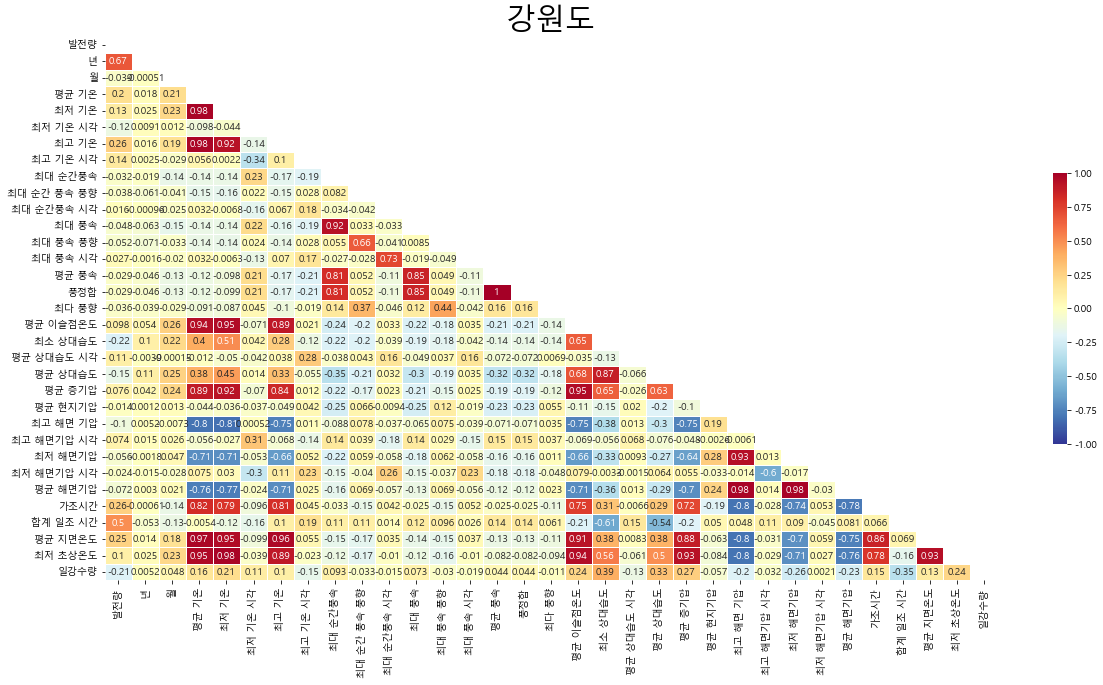

In [47]:
mask = np.zeros_like(kangwon.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(kangwon.corr(), 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.title('강원도',fontdict={'fontsize' : 30})
plt.show()

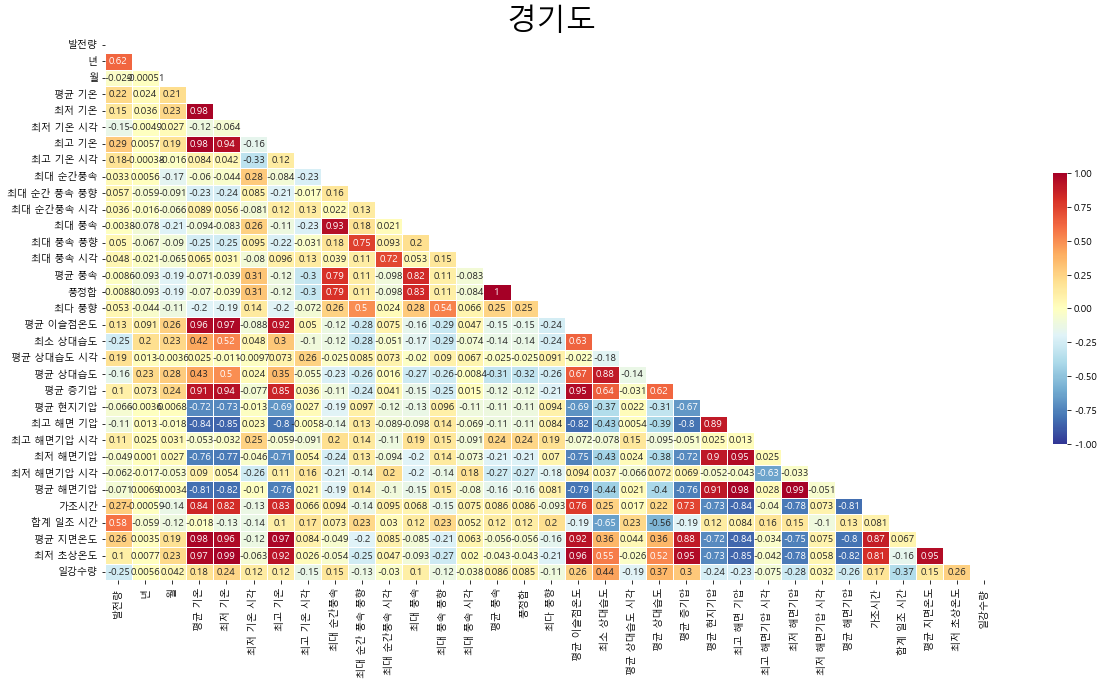

In [48]:

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(gyeonggi.corr())
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(gyeonggi.corr(), 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.title('경기도',fontdict={'fontsize' : 30})
plt.show()


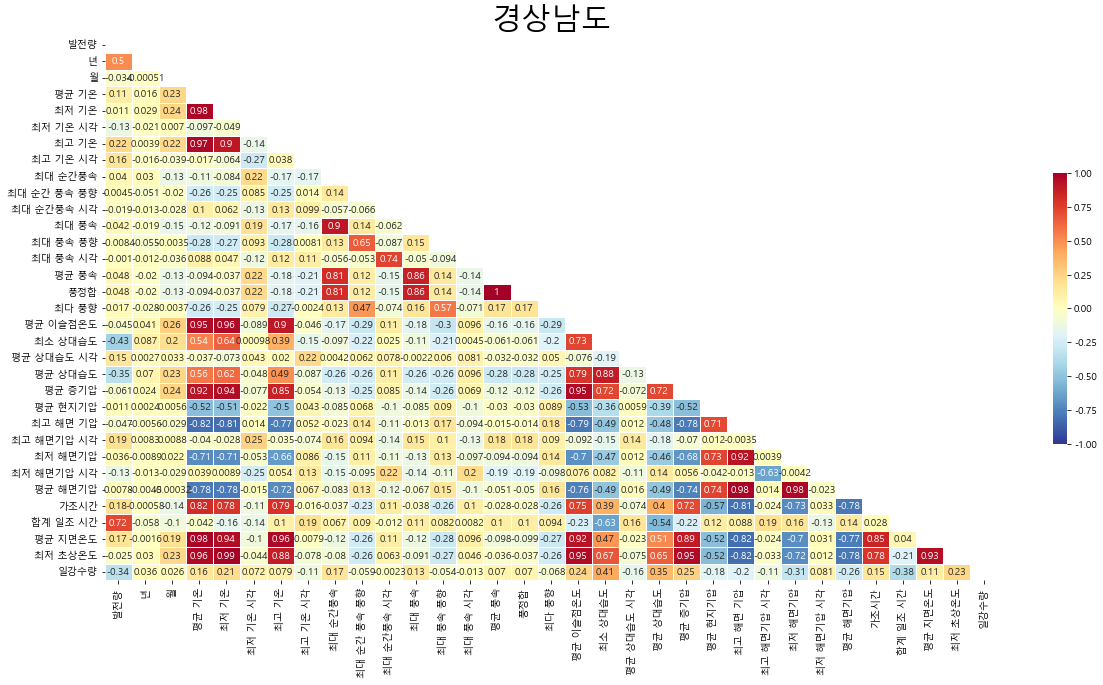

In [49]:

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(Gyeongsangnam.corr())
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(Gyeongsangnam.corr(), 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.title('경상남도',fontdict={'fontsize' : 30})
plt.show()


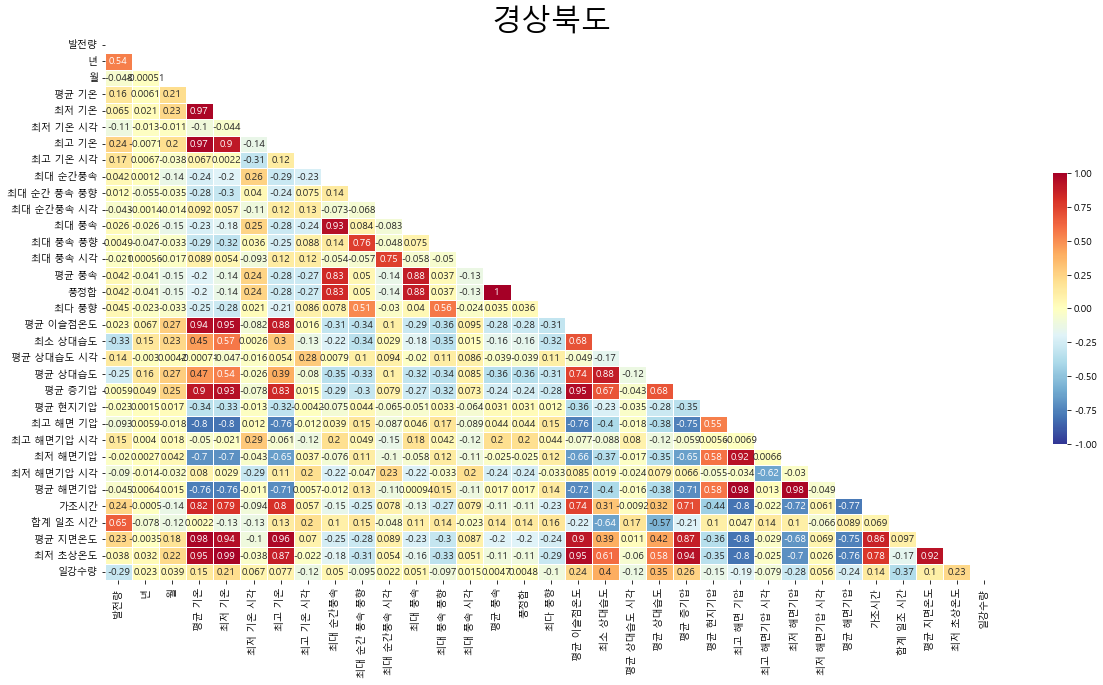

In [50]:

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(Gyeongsangbuk.corr())
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(Gyeongsangbuk.corr(), 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.title('경상북도',fontdict={'fontsize' : 30})
plt.show()


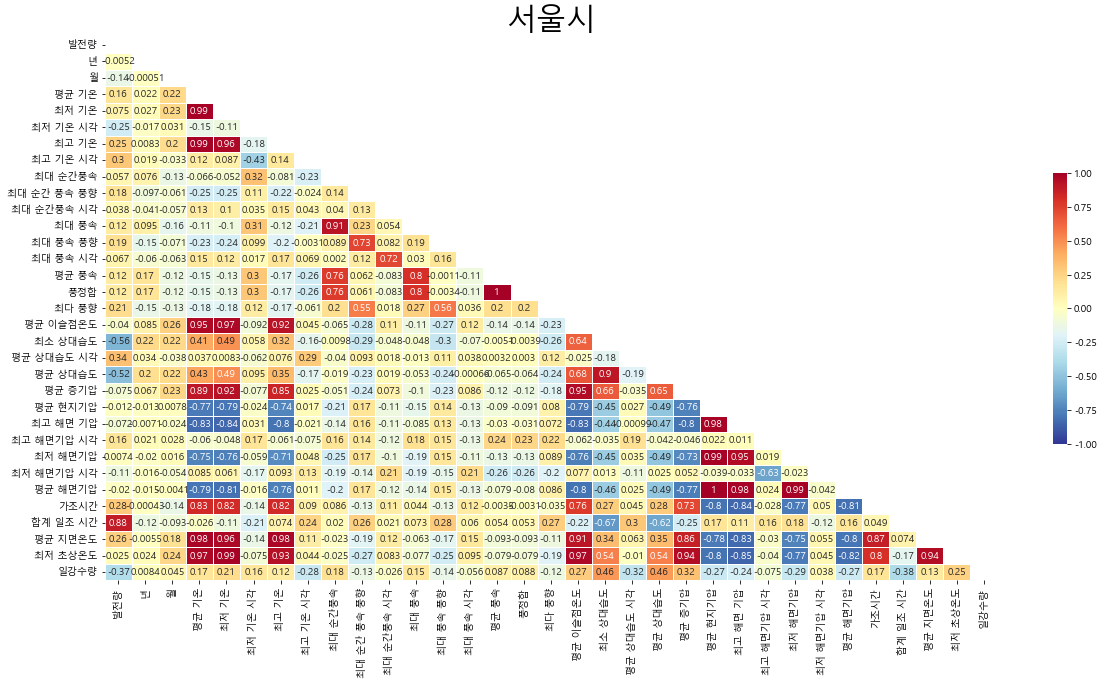

In [51]:

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(seoul.corr())
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(seoul.corr(), 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.title('서울시',fontdict={'fontsize' : 30})
plt.show()


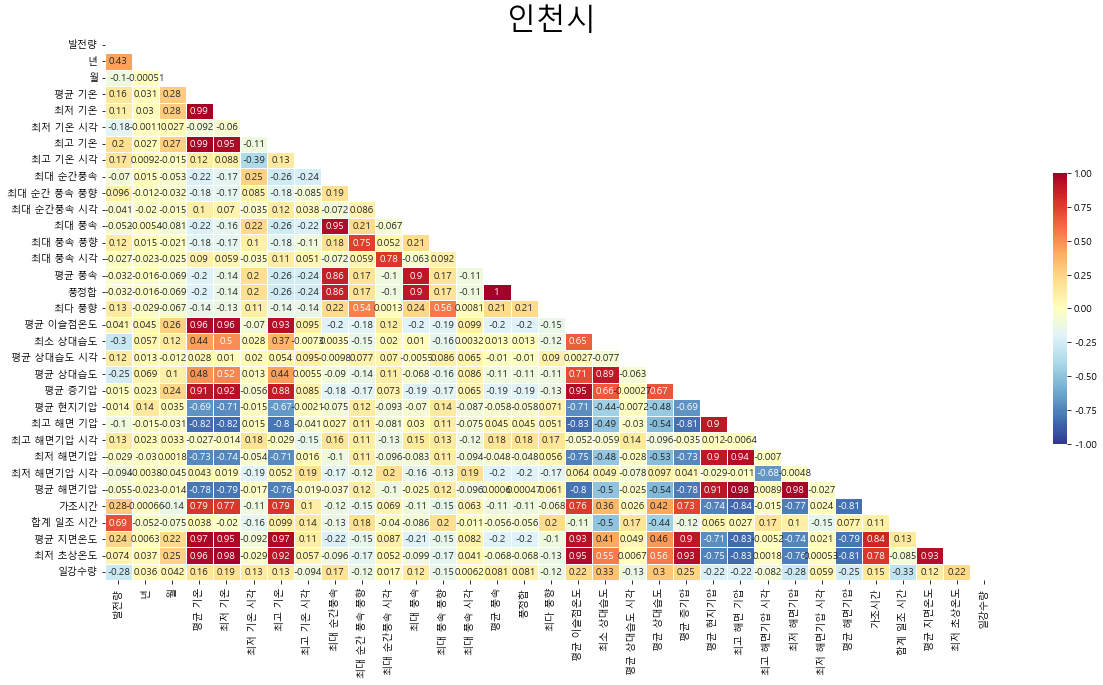

In [52]:

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(Incheon.corr())
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(Incheon.corr(), 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.title('인천시',fontdict={'fontsize' : 30})
plt.show()


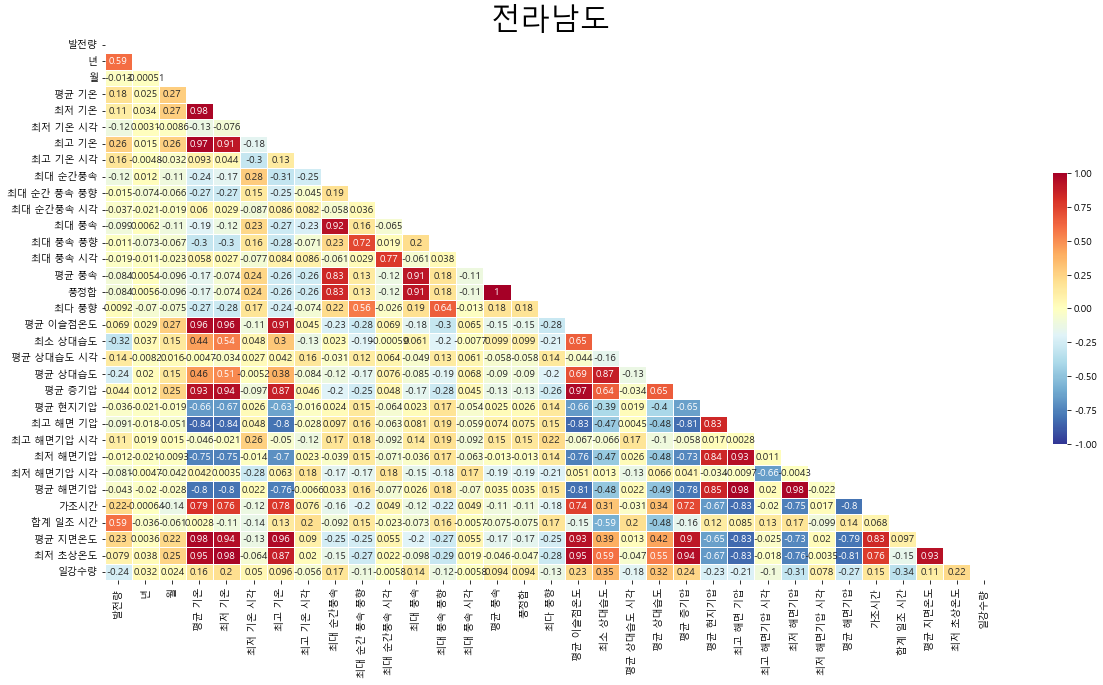

In [53]:

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(Jeollanam.corr())
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(Jeollanam.corr(), 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.title('전라남도',fontdict={'fontsize' : 30})
plt.show()


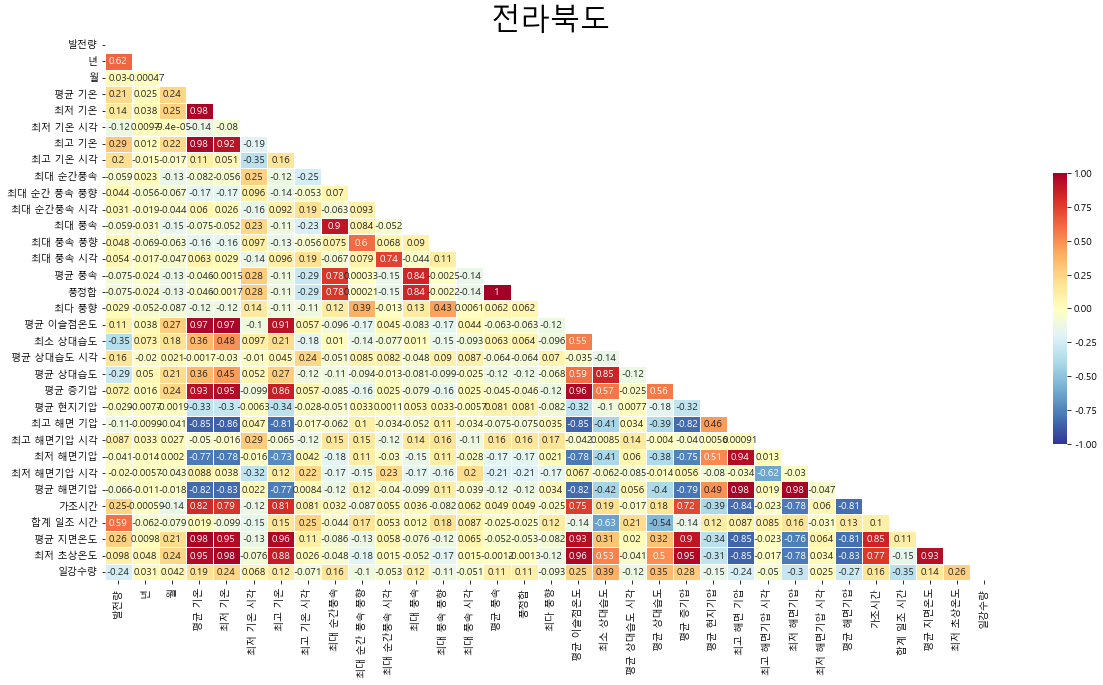

In [54]:

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(Jeollabuk.corr())
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(Jeollabuk.corr(), 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.title('전라북도',fontdict={'fontsize' : 30})
plt.show()


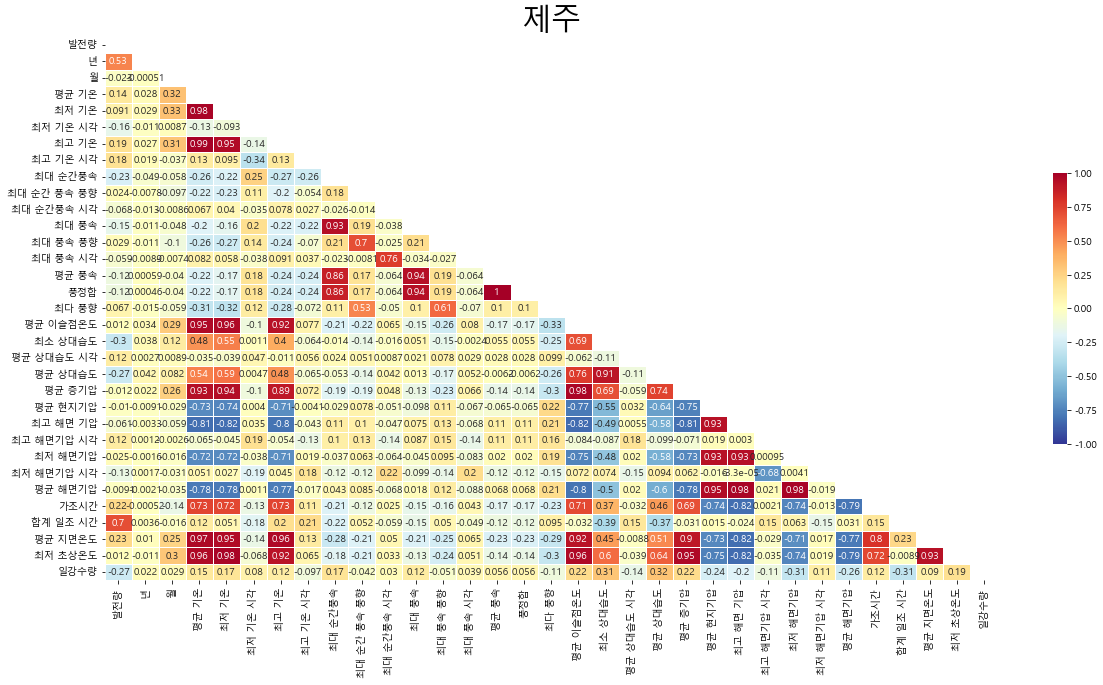

In [55]:

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(Jeju.corr())
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(Jeju.corr(), 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.title('제주',fontdict={'fontsize' : 30})
plt.show()


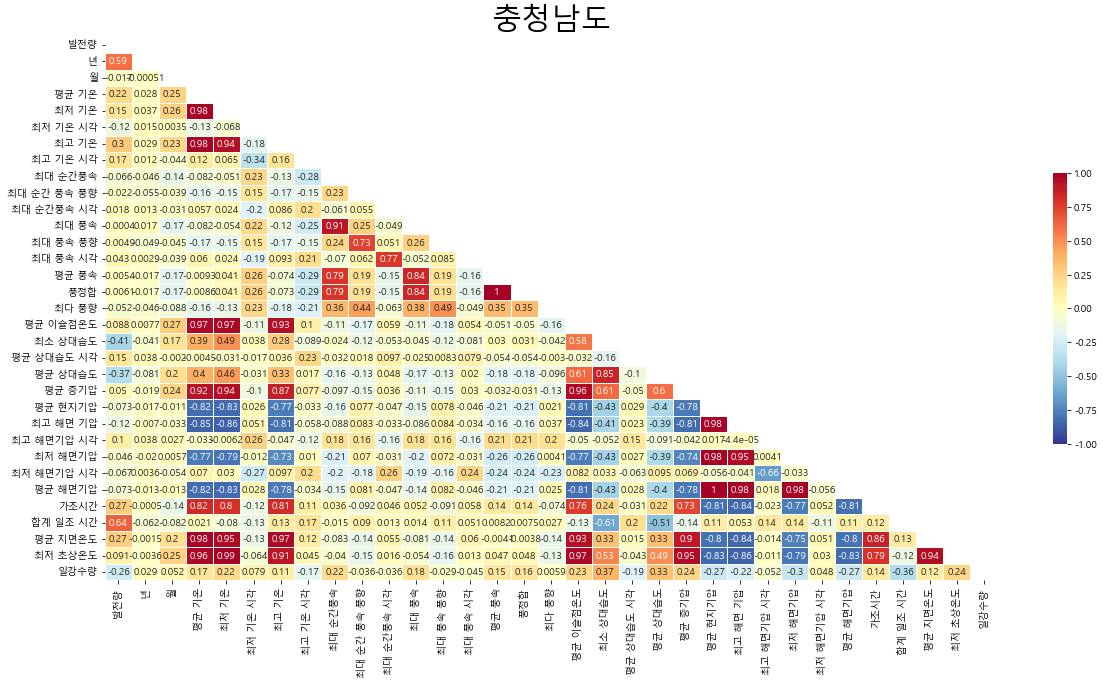

In [56]:

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(Chungcheongnam.corr())
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(Chungcheongnam.corr(), 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.title('충청남도',fontdict={'fontsize' : 30})
plt.show()


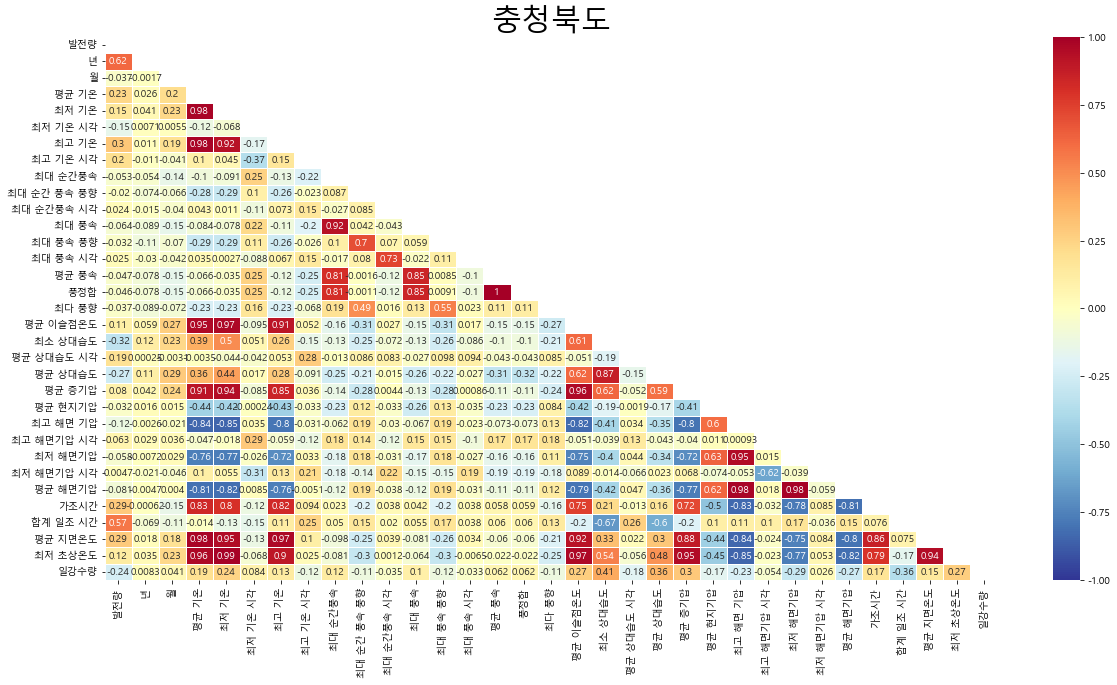

In [57]:

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(chungcheongbuk.corr())
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(chungcheongbuk.corr(), 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": 1},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.title('충청북도',fontdict={'fontsize' : 30})
plt.show()


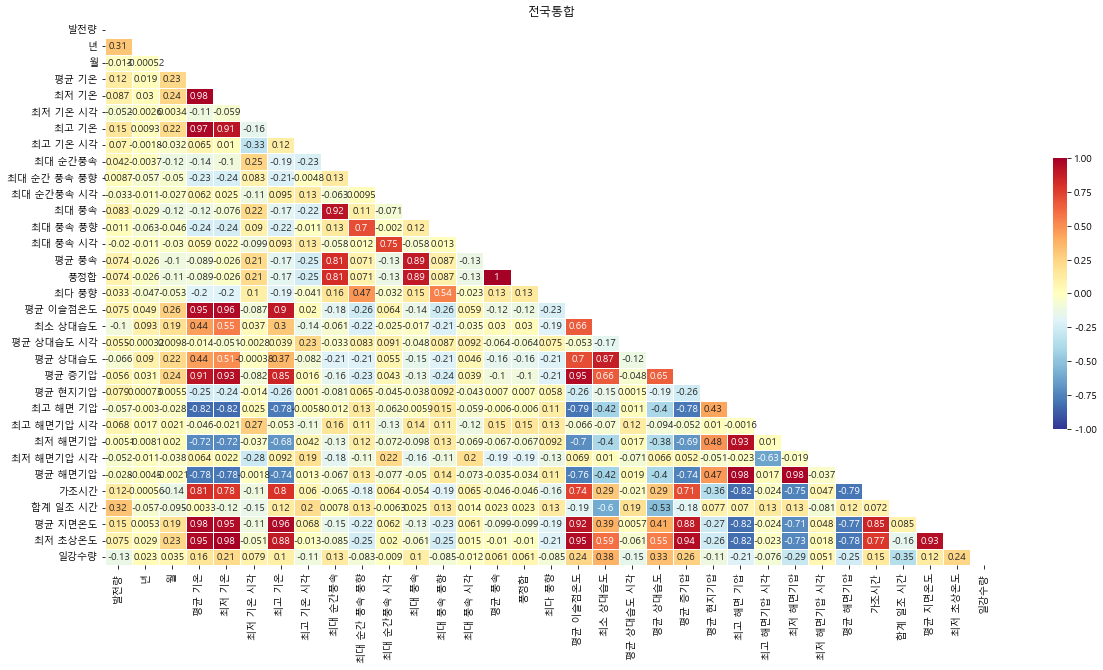

In [58]:


# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(weather_power_refined.corr())
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(weather_power_refined.corr(), 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )
plt.title('전국통합')
plt.show()


# '''
# 년도 - 확실한 +상관관계 => 태양광 발전설비 증가 등의 원인추정 가능
# 기온 - 애매한 상관관계 => 일반적으로 양의 상관관계나 0.1~0.3 범위로 약한 상관관계를 보임
# 일조시간 - 확실한 +상관관계 => 0.5~0.7 범위로 매우 강한 상관관계 -> 태양광 발전 특성과 맞음


# ''' 


In [60]:
weather_power_refined.columns

Index(['지역', '일시', '발전량', '년', '월', '계절', '평균 기온', '최저 기온', '최저 기온 시각',
       '최고 기온', '최고 기온 시각', '최대 순간풍속', '최대 순간 풍속 풍향', '최대 순간풍속 시각', '최대 풍속',
       '최대 풍속 풍향', '최대 풍속 시각', '평균 풍속', '풍정합', '최다 풍향', '평균 이슬점온도', '최소 상대습도',
       '평균 상대습도 시각', '평균 상대습도', '평균 증기압', '평균 현지기압', '최고 해면 기압', '최고 해면기압 시각',
       '최저 해면기압', '최저 해면기압 시각', '평균 해면기압', '가조시간', '합계 일조 시간', '평균 지면온도',
       '최저 초상온도', '일강수량'],
      dtype='object')

In [64]:
weather_power_groupby = weather_power_refined.groupby(['지역','일시']).mean()

In [71]:
weather_power_groupby

발전량       년     월     평균 기온      최저 기온     최저 기온 시각  \
지역   일시                                                                       
강원도  2017-01-01  154918.180  2017.0   1.0  1.942857  -2.392857   586.857143   
     2017-01-02  104640.902  2017.0   1.0  4.235714   0.235714  1339.285714   
     2017-01-03  258526.982  2017.0   1.0  2.314286  -2.392857   745.357143   
     2017-01-04  259588.645  2017.0   1.0  2.657143  -1.992857  1427.785714   
     2017-01-05  109151.179  2017.0   1.0  1.578571  -2.792857   459.071429   
...                     ...     ...   ...       ...        ...          ...   
충청북도 2021-12-27  612336.293  2021.0  12.0 -5.733333 -13.125000   626.333333   
     2021-12-28  260067.376  2021.0  12.0 -1.483333  -5.325000   713.750000   
     2021-12-29  281289.137  2021.0  12.0  1.625000  -3.800000   147.750000   
     2021-12-30  661147.861  2021.0  12.0 -1.883333  -4.341667  1965.750000   
     2021-12-31  836706.701  2021.0  12.0 -5.425000  -9.225000  1671.166667   

                    최고 기온     최고 기온 시각    최대 순간풍속  최대 순간 풍속 풍향  ...  \
지역   일시                                                         ...   
강원도  2017-01-01  6.635714  1419.714286   6.278571   230.000000  ...   
     2017-01-02  8.478571  1346.071429   8.700000   251.428571  ...   
     2017-01-03  8.028571  1423.642857   7.971429   241.428571  ...   
     2017-01-04  9.000000  1347.142857   6.357143   237.142857  ...   
     2017-01-05  5.578571  1190.285714   6.671429   175.714286  ...   
...                   ...          ...        ...          ...  ...   
충청북도 2021-12-27 -0.358333  1595.833333   6.025000   226.666667  ...   
     2021-12-28  2.716667  1487.250000   3.775000   235.833333  ...   
     2021-12-29  7.025000  1331.250000   9.350000   300.000000  ...   
     2021-12-30  1.741667  1204.583333  10.125000   306.666667  ...   
     2021-12-31 -1.133333  1426.916667   9.291667   302.500000  ...   

                    최고 해면 기압   최고 해면기압 시각      최저 해면기압   최저 해면기압 시각  \
지역   일시                                                               
강원도  2017-01-01  1030.442857   900.785714  1023.978571  2272.642857   
     2017-01-02  1024.028571    12.428571  1018.842857  1457.285714   
     2017-01-03  1024.978571   844.928571  1020.592857  1525.285714   
     2017-01-04  1026.535714  2228.785714  1020.707143   862.500000   
     2017-01-05  1031.357143  2087.785714  1026.307143     4.214286   
...                      ...          ...          ...          ...   
충청북도 2021-12-27  1034.166667   741.166667  1029.150000  1556.750000   
     2021-12-28  1030.691667   753.666667  1024.883333  2336.750000   
     2021-12-29  1024.933333     1.916667  1017.216667  1442.083333   
     2021-12-30  1028.266667  2350.083333  1021.758333     2.250000   
     2021-12-31  1033.400000  1899.833333  1028.158333     3.416667   

                     평균 해면기압      가조시간  합계 일조 시간   평균 지면온도    최저 초상온도  \
지역   일시                                                                 
강원도  2017-01-01  1027.350000  9.621429  5.064286  0.342857  -6.178571   
     2017-01-02  1021.214286  9.635714  4.157143  1.785714  -4.414286   
     2017-01-03  1022.514286  9.635714  7.392857  0.957143  -6.478571   
     2017-01-04  1023.685714  9.664286  7.692857  1.292857  -5.985714   
     2017-01-05  1029.535714  9.678571  0.892857  0.614286  -6.392857   
...                      ...       ...       ...       ...        ...   
충청북도 2021-12-27  1031.466667  9.683333  5.491667 -3.891667 -14.925000   
     2021-12-28  1027.975000  9.691667  0.600000 -0.891667  -8.958333   
     2021-12-29  1020.425000  9.691667  1.783333  0.800000  -7.050000   
     2021-12-30  1025.308333  9.708333  5.566667 -0.733333  -8.016667   
     2021-12-31  1031.441667  9.700000  8.575000 -2.225000 -12.783333   

                     일강수량  
지역   일시                    
강원도  2017-01-01  0.000000  
     2017-01-02  0.028571  
     2017-01-03  0.000000  
     2017-01-04  0.000000  
     2017-01-05  4.392857  
..

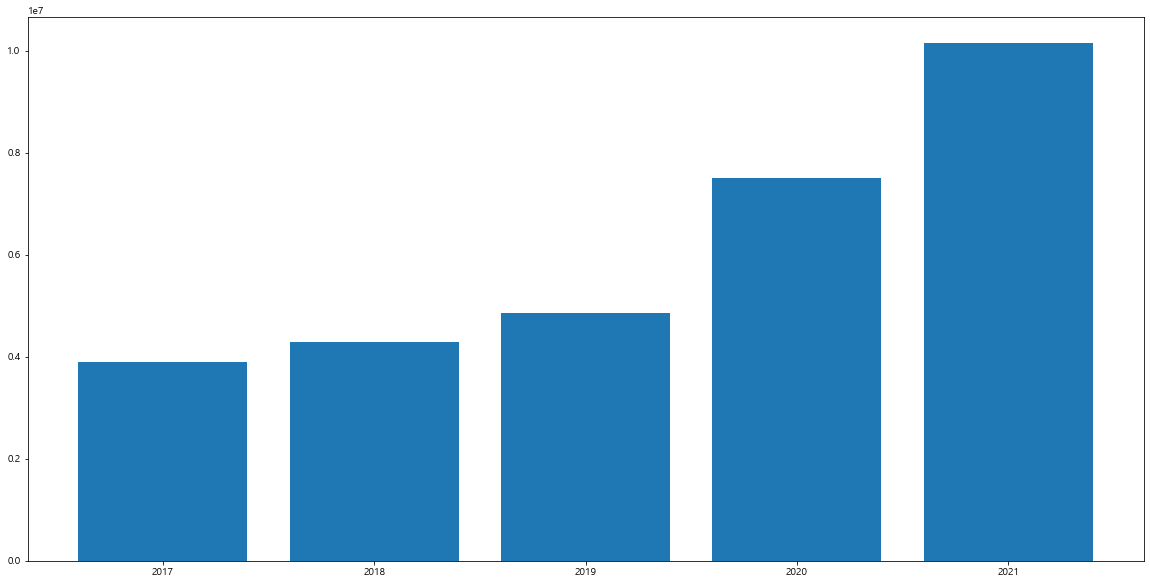

In [74]:
plt.bar(x='년',height='발전량',data=weather_power_groupby)
plt.show()

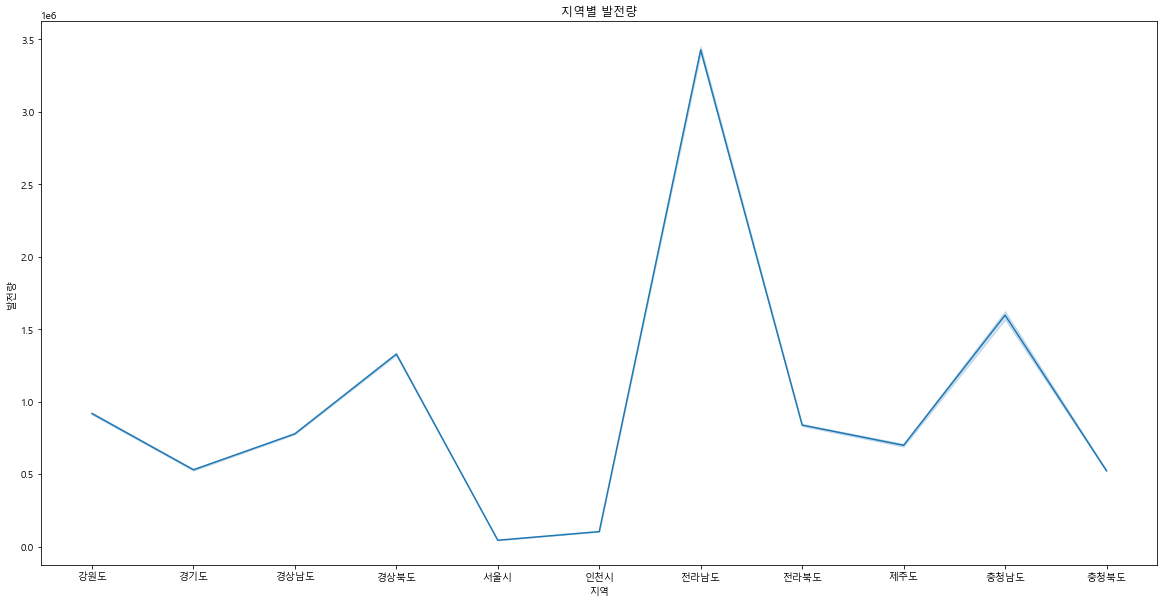

In [75]:
sns.lineplot(x='지역',y='발전량',data = weather_power_refined)
plt.title('지역별 발전량')
plt.show()

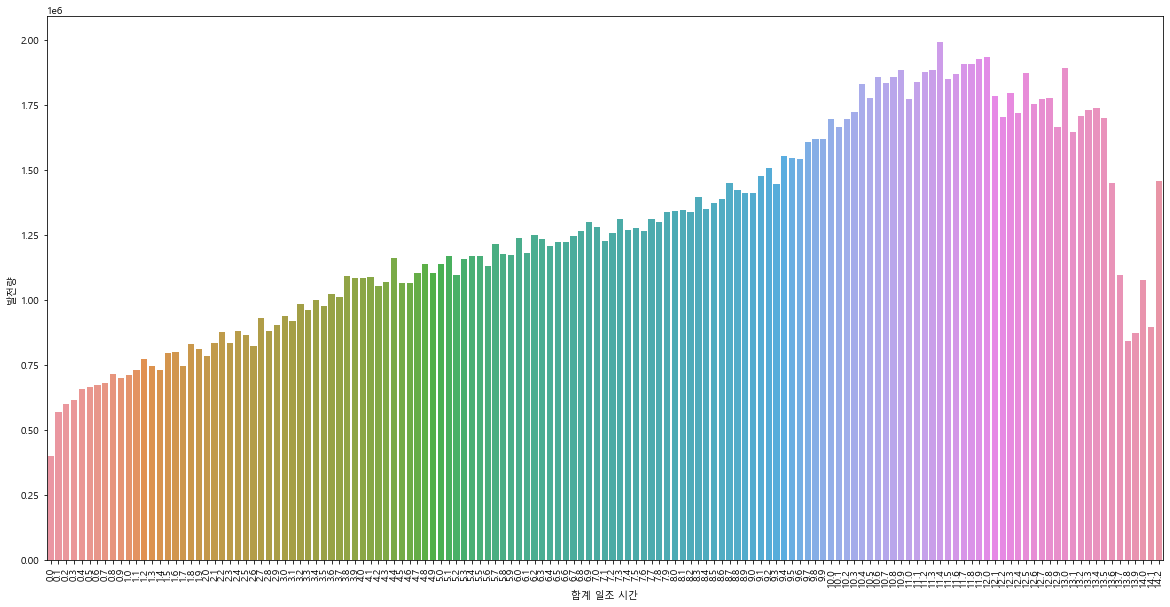

In [78]:
sns.barplot(x='합계 일조 시간',y='발전량',data=weather_power_refined,ci=None)
plt.xticks(rotation=90)
plt.show()